# Logistic Regression from SKLearn over MNIST Dataset (Multi-Class Classification)
Logistic regression is a statistical model that in its basic form uses a logistic function to model a multiple dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary/multiple regression). It is a Discriminate Learning Algorithm which means that it try to find posterior probability over classes directly without the envolvement of likelihood probabilities.<br>

In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead, True/False or healthy/sick. <br>

This can be extended to Classify several classes of events such as determining whether an image contains a cat, dog, lion, etc.<br>

This code contains only about how we can fit a logistic model over user given dataset and also to get a good output result out of it. The code written keeping vision of object oriented programing which means that the code is fully moduler so that to keep in mind about the use of the functions in other programs also.
# ----------------------------------------------------------------------------------------------------------
### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

### Calling Data
Data is call for fitting of object classifer created here. The Columns are selected here is according to the DIGIT RECOGNISATION DATASET from Famous MNIST DATASET Easily find on Kaggle(https://www.kaggle.com/oddrationale/mnist-in-csv?select=mnist_train.csv).

In [2]:
training_data = pd.read_csv('mnist_train.csv')
testing_data = pd.read_csv('mnist_test.csv')

### Preprocessing of training and testing data

In [3]:
training_labels = training_data['label']
training_data.drop(['label'],axis=1,inplace=True)
testing_labels = testing_data['label']
testing_data.drop(['label'],axis=1,inplace=True)


### Normalising the data
Scaling the features.<br>
The scaling is also know as standardisation/normalisation. Standardization is a process for making a dataset fit for the training of the model. In this prosess we make a dataset whose value lies between zero mean and one standard deviation. The Data Comming out from this process is smooth for the curves and fitting a model.

In [4]:
sc=StandardScaler()
training_data=sc.fit_transform(training_data)
testing_data=sc.fit_transform(testing_data)

# ----------------------------------------------------------------------------------------------------------
## Logistic Regression Model
Creating a Logistic regression model object and fitting it over training data.<br>
The Model contain these three function for the fitting over the data.
### --------------------------------------------------------------------------------------------------------------------------------------
### Softmax Function
Defining the Softmax Function. Softmax function is use in the ml to get the probability value (i.e. between 0 to 1) for any feature. The function basically has the formula which make the value equal to probable value of the feature between 0 to 1.<br>
 Funtion to return Posterior Probabilities
### Formula : 
$$S_ \theta (x,c) =  \frac{e^{-{( \theta^{0Tx} + \theta_0)}}}{\sum_{i=0}^{n}e^{-{( \theta^{i Tx} + \theta_0^i)}}}$$
### --------------------------------------------------------------------------------------------------------------------------------------
### Derivative Functions
Derivative functions are define to find the derivative of the features to train the model and get the weights for the GDA<br>
Funtions to return derivatives with respect to wieghts for GDA
### Formula : del by del0s
$$\frac{\partial }{\partial \theta_ \mathrm{0}}\mathbf{S_i(\theta,C)}$$
### Formula : del by dels
$$\frac{\partial }{\partial \theta}\mathbf{S_i(\theta,C)}$$
### --------------------------------------------------------------------------------------------------------------------------------------
### Cross Entropy Function 
Defining Function for Cross Entroy Loss calculation.In Convex Optimization we find the global minima to train the model so it get less error while prediction for the testing and training data. This error is called  as loss. We introduce log and a negative sign in case to smoothing of and inverting the parabola to find the global minima.<br>
##### Here, Logrithm is use to smoothing out the curve so that it don't stucked in any local minima. 
##### Here, Negative sign is introduce to invert the parabola of the function.
### Formula : 
$$L_ \theta (S,C) = -\log \left( \frac{\sum_{i=0}^{n}C^i * S_i(\theta,X)}{One Hot Encode Length(C)}\right)$$
### --------------------------------------------------------------------------------------------------------------------------------------
### Gradient Descent
The Fit function is to fit the learning curve and reduce the loss of the model. The algorithm use here is the Stocastic Gradient Descent(SGD). The algorithm is containing the learning rate,epsilon for the stoping of under going algorithm to find global minima.Creating Classifier object and fitting to our training data

In [5]:
logistic=LogisticRegression(verbose=1,multi_class='ovr',max_iter=10000)

In [6]:
logistic.fit(training_data,training_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.1min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

### Prediction Function
Prediction function is use to get the accuracy of the fitted model over training and testing data so that we can get to know how much accurate over model is trained over training data to predict right output.

In [7]:
def accuracy_with_confusion_matrix(model,testing_data,testing_labels):
    predict = model.predict(testing_data)
    accuracy = model.score(testing_data,testing_labels)
    accuracy = accuracy*100
    print('Accuracy : ',accuracy)
    cm = confusion_matrix(testing_labels,predict)
    print("\n\nThe Confusion Matrix is : \n\n",cm,"\n\nThe Graph Plot over Confusion Matrix : \n")
    plot_confusion_matrix(model,testing_data,testing_labels)

### Predicting result on both the datasets

#### Training Accuracy

Accuracy :  93.14833333333333


The Confusion Matrix is : 

 [[5811    1   14    9    6   14   28    3   35    2]
 [   1 6601   29   13    5   21    2   11   52    7]
 [  35   45 5457   80   53   21   53   61  136   17]
 [  21   22  140 5524    9  160   21   51  119   64]
 [   7   23   30    7 5513   11   26   16   51  158]
 [  45   20   36  155   56 4843   89   14  113   50]
 [  29   10   28    3   25   84 5707    3   26    3]
 [  13   18   54    8   53    7    4 5926   18  164]
 [  44  116   60  140   34  144   41   24 5164   84]
 [  26   18   19  100  168   45    2  182   46 5343]] 

The Graph Plot over Confusion Matrix : 



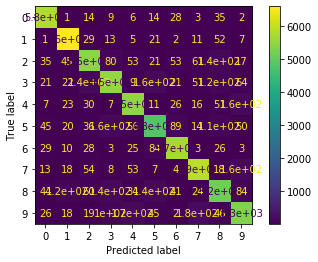

In [8]:
accuracy_with_confusion_matrix(logistic,training_data,training_labels)

#### Testing Accuracy

Accuracy :  91.75


The Confusion Matrix is : 

 [[ 960    0    2    1    0    6    5    3    2    1]
 [   0 1109    5    3    0    1    5    1   11    0]
 [  11   12  913   19   10    5   10   15   35    2]
 [   4    2   17  918    3   25    4   10   18    9]
 [   1    4    3    7  917    0    8    3    5   34]
 [   9    1    0   37   11  779   17    8   24    6]
 [   9    4    8    1    7   22  904    1    2    0]
 [   4    9   23    5    7    2    1  941    5   31]
 [  11   15    7   22   13   30   10   12  841   13]
 [   7    8    2   14   32   13    0   28   12  893]] 

The Graph Plot over Confusion Matrix : 



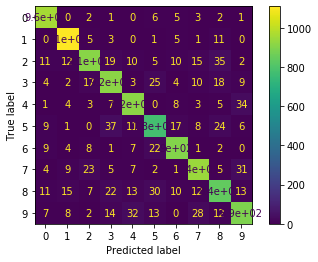

In [9]:
accuracy_with_confusion_matrix(logistic,testing_data,testing_labels)